Temporal - made Enzito

Project your image dataset (raw data) into 2 dimensions using PCA, and visualize/plot the dataset with color codes depending on the classes. In addition, plot the 2 eigenvectors. (Proyectar tu dataset (data en bruto) a dos dimensiones usando PCA, y visualizar/plotear el dataset con un codigo de colores dependiendo de las clases. Plotear los dos eigenvectors tambien.)


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.io import imread_collection

In [ ]:
#Verificacion de la dimensionalidad de las imagenes 

from PIL import Image
import os

path = "img/"
def compare_dimension(route):
    with Image.open(route) as img:
        ancho , alto = img.size
    return ancho, alto 

lastancho = 96
lastalto = 96
for clse in range(1,11):
    ruta = os.path.join(path,str(clse))
    for archivo in os.listdir(ruta):
        if(archivo.endswith(".png")):
            ruta_img = os.path.join(ruta,archivo)
            ancho , alto = compare_dimension(ruta_img)
            if(lastancho != ancho or lastalto != alto):
                print("Fail")
            lastancho = ancho
            lastalto = alto
            print("ancho : " , ancho, " alto : ", alto)

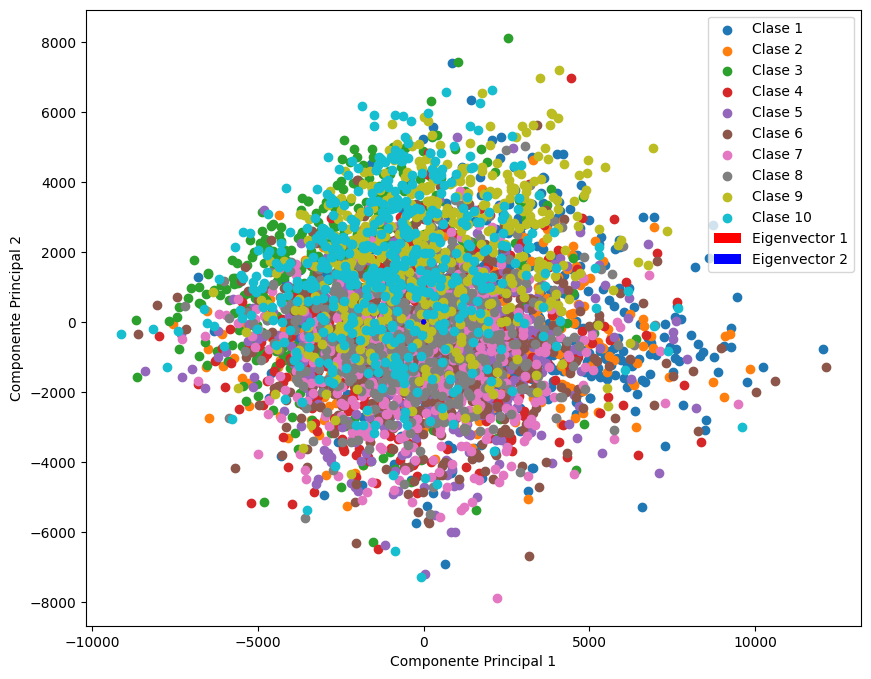

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

#ruta Carpeta 
path = "img/"

# Lista para almacenar las imágenes y las etiquetas
images = []
labels = []

# Iterar por las 10 clases
for clse in range(1,11):
    #Obtener el path de la cada clase
    ruta = os.path.join(path,str(clse))
    # Obtener los datos
    for archivo in os.listdir(ruta):
        if(archivo.endswith(".png")):
            ruta_img = os.path.join(ruta,archivo)
            img = Image.open(ruta_img).convert("L")
            img_array = np.array(img)
            img_flat = img_array.flatten()
            images.append(img_flat)
            labels.append(clse)
            
X = np.array(images)
Y = np.array(labels)

Vpca = PCA(n_components=2)
X_pca = Vpca.fit_transform(X)

plt.figure(figsize=(10, 8))

# Plotear los puntos con códigos de color basados en las clases
for i in np.unique(Y):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], label=f'Clase {i}')

# Plotear los eigenvectores
eigenvectors = Vpca.components_.T
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], color='red', scale=3, label='Eigenvector 1')
plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], color='blue', scale=3, label='Eigenvector 2')

# Establecer etiquetas y leyenda
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

# Mostrar el gráfico
plt.show()
            
            